In [16]:
#DEFINE LIBRARY NEEDED TO GRAB STOCK DATA FROM A URL
import urllib
import urllib2
import csv
import numpy as np
import Helpers
import datetime
import matplotlib.pyplot as plt
import calendar

#FUNCTION TO CREATE URL TO HAVE CSV FILE
base_url = "http://ichart.finance.yahoo.com/table.csv?s="
def make_url(ticker_symbol):
    return base_url + ticker_symbol

#FUNCTION TO CONVERT DATE TO DAYS BEHIND PRESENT


#FUNCTION TO PLOT STOCK DATA
def load_stock(name,days):
    #LOAD CSV OF DATA
    response = urllib2.urlopen(make_url(name))
    cr = csv.reader(response)
    next(cr)
    
    #CLEAR NUMPY ARRAYS
    #%xdel f_time
    #%xdel f_date
    #%xdel f_open
    #%xdel f_clos
    #%xdel f_high
    #%xdel f_loww
    #%xdel f_volu
    #%xdel f_aclo

    #ALLOCATE NUMPY ARRAYS
    f_time = np.zeros((0,0))
    f_date = np.zeros((0,0))
    f_open = np.zeros((0,0))
    f_clos = np.zeros((0,0))
    f_high = np.zeros((0,0))
    f_loww = np.zeros((0,0))
    f_volu = np.zeros((0,0))
    f_aclo = np.zeros((0,0))

    i = 0
    j = 0
    for row in cr:
        #PROCESS TIMESTAMP
        dt = datetime.datetime.strptime(row[0],'%Y-%m-%d')
        day_of_year = dt.timetuple().tm_yday
        date_of_end = datetime.datetime(dt.year,12,31)
        end_of_year = date_of_end.timetuple().tm_yday
        f_time = np.append(time,Helpers.getTimeStampFromDate(dt.year,dt.month,dt.day,0,0,0,0))
        f_date = np.append(f_date,float(dt.year)+float(day_of_year)/float(end_of_year))
    
        #PROCESS OPENING VALUE
        f_open = np.append(f_open,float(row[1]))
    
        #PROCESS CLOSING VALUE
        f_clos = np.append(f_clos,float(row[4]))
        
        #PROCESS HIGH VALUE
        f_high = np.append(f_high,float(row[2]))
    
        #PROCESS LOW VALUE
        f_loww = np.append(f_loww,float(row[3]))
    
        #PROCESS VOLUME
        f_volu = np.append(f_volu,float(row[5]))
    
        #PROCESS ADJUSTED CLOSE
        f_aclo = np.append(f_aclo,float(row[6]))
    
    
        j = j+1
        #IF BOTH START AND END ARE DEFINED THEN SKIP "i" INCREMENT
        if len(days) > 1:
            #DO NOT INCREMENT UNTIL PAST "min_days"
            if j > days[0]:
                i = i+1
            else:
                #REMOVE ROWS THAT WERE APPENDED
                f_time = np.delete(f_time,0)
                f_date = np.delete(f_date,0)
                f_open = np.delete(f_open,0)
                f_clos = np.delete(f_clos,0)
                f_high = np.delete(f_high,0)
                f_loww = np.delete(f_loww,0)
                f_volu = np.delete(f_volu,0)
                f_aclo = np.delete(f_aclo,0)
                
            #EXIT ONCE NUMBER OF DAYS IS REACHED
            if j > days[1]:
                break
        else:
            #INCREMENT DAY COUNTER    
            i = i+1
        
            #EXIT ONCE NUMBER OF DAYS IS REACHED
            if i > days[0] and days[0] > 0:
                break
            
    fig = plt.figure()
    fig.set_size_inches(12,4)

    p1 = fig.add_subplot(1,2,1)
    p1.plot(f_date,f_open,label = 'Opening Value',marker = '.')
    p1.plot(f_date,f_clos,label = 'Closing Value',marker = 'x')
    p1.plot(f_date,f_aclo,label = 'Adjusted Close Value',marker = 'o')
    plt.axis([min(f_date), max(f_date), min([min(f_open),min(f_clos),min(f_aclo)]), max(f_open)])
    plt.xlabel('Year')
    plt.ylabel('Stock Price [$]')
    x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    p1.xaxis.set_major_formatter(x_formatter)
    plt.title(name + ' Index Value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True,ncol=2)
    plt.grid()

    p2 = fig.add_subplot(1,2,2)
    plt.plot(f_date,f_clos-f_open,label = 'Change in Value',marker = '.')
    plt.axis([min(f_date), max(f_date), min(f_clos-f_open), max(f_clos-f_open)])
    plt.xlabel('Year')
    plt.ylabel('Stock Price Change [$]')
    x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    p2.xaxis.set_major_formatter(x_formatter)
    plt.title(name + ' Index Change in Value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True,ncol=2)
    plt.grid()

    fig = plt.figure()
    fig.set_size_inches(12,4)

    p1 = fig.add_subplot(1,2,1)
    p1.plot(f_date,f_high,label = 'High Value',marker = '.')
    p1.plot(f_date,f_loww,label = 'Low  Value',marker = 'x')
    plt.axis([min(f_date), max(f_date), min(f_loww), max(f_high)])
    plt.xlabel('Year')
    plt.ylabel('Stock Price [$]')
    x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    p1.xaxis.set_major_formatter(x_formatter)
    plt.title(name + ' Index Value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True,ncol=2)
    plt.grid()

    p2 = fig.add_subplot(1,2,2)
    plt.plot(f_date,f_volu,label = 'Volume',marker = '.')
    plt.axis([min(f_date), max(f_date), 0.9*min(f_volu), 1.1*max(f_volu)])
    plt.xlabel('Year')
    plt.ylabel('Volume [--]')
    x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    p2.xaxis.set_major_formatter(x_formatter)
    plt.title(name + ' Index Volume')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True,ncol=2)
    plt.grid()
    
#FUNCTION TO PLOT MUTUAL FUND DATA
def load_mut_fund(name,days):
    #LOAD CSV OF DATA
    response = urllib2.urlopen(make_url(name))
    cr = csv.reader(response)
    next(cr)
    
    #CLEAR NUMPY ARRAYS
    #%xdel f_time
    #%xdel f_date
    #%xdel f_open
    #%xdel f_clos
    #%xdel f_high
    #%xdel f_loww
    #%xdel f_volu
    #%xdel f_aclo

    #ALLOCATE NUMPY ARRAYS
    f_time = np.zeros((0,0))
    f_date = np.zeros((0,0))
    f_open = np.zeros((0,0))
    f_clos = np.zeros((0,0))
    f_high = np.zeros((0,0))
    f_loww = np.zeros((0,0))
    f_volu = np.zeros((0,0))
    f_aclo = np.zeros((0,0))

    i = 0
    j = 0
    for row in cr:
        #PROCESS TIMESTAMP
        dt = datetime.datetime.strptime(row[0],'%Y-%m-%d')
        day_of_year = dt.timetuple().tm_yday
        date_of_end = datetime.datetime(dt.year,12,31)
        end_of_year = date_of_end.timetuple().tm_yday
        f_time = np.append(time,Helpers.getTimeStampFromDate(dt.year,dt.month,dt.day,0,0,0,0))
        f_date = np.append(f_date,float(dt.year)+float(day_of_year)/float(end_of_year))
    
        #PROCESS OPENING VALUE
        #f_open = np.append(f_open,float(row[1]))
    
        #PROCESS CLOSING VALUE
        f_clos = np.append(f_clos,float(row[4]))
        
        #PROCESS HIGH VALUE
        #f_high = np.append(f_high,float(row[2]))
    
        #PROCESS LOW VALUE
        #f_loww = np.append(f_loww,float(row[3]))
    
        #PROCESS VOLUME
        #f_volu = np.append(f_volu,float(row[5]))
    
        #PROCESS ADJUSTED CLOSE
        f_aclo = np.append(f_aclo,float(row[6]))
    
        j = j+1
        #IF BOTH START AND END ARE DEFINED THEN SKIP "i" INCREMENT
        if len(days) > 1:
            #DO NOT INCREMENT UNTIL PAST "min_days"
            if j > days[0]:
                i = i+1
            else:
                #REMOVE ROWS THAT WERE APPENDED
                f_time = np.delete(f_time,0)
                f_date = np.delete(f_date,0)
                f_clos = np.delete(f_clos,0)
                f_aclo = np.delete(f_aclo,0)
                
            #EXIT ONCE NUMBER OF DAYS IS REACHED
            if j > days[1]:
                break
        else:
            #INCREMENT DAY COUNTER    
            i = i+1
        
            #EXIT ONCE NUMBER OF DAYS IS REACHED
            if i > days[0] and days[0] > 0:
                break
            
    fig = plt.figure()
    fig.set_size_inches(48,8)

    p1 = fig.add_subplot(1,2,1)
    p1.plot(f_date,f_clos,label = 'Value',marker = '.')
    p1.plot(f_date,f_aclo,label = 'Adjusted Value',marker = 'x')
    plt.axis([min(f_date), max(f_date), min([min(f_clos),min(f_aclo)]), max([max(f_clos),max(f_aclo)])])
    plt.xlabel('Year')
    plt.ylabel('Stock Price [$]')
    x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    p1.xaxis.set_major_formatter(x_formatter)
    plt.title(name + ' Index Value')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.075),
           fancybox=True, shadow=True,ncol=2)
    plt.grid()

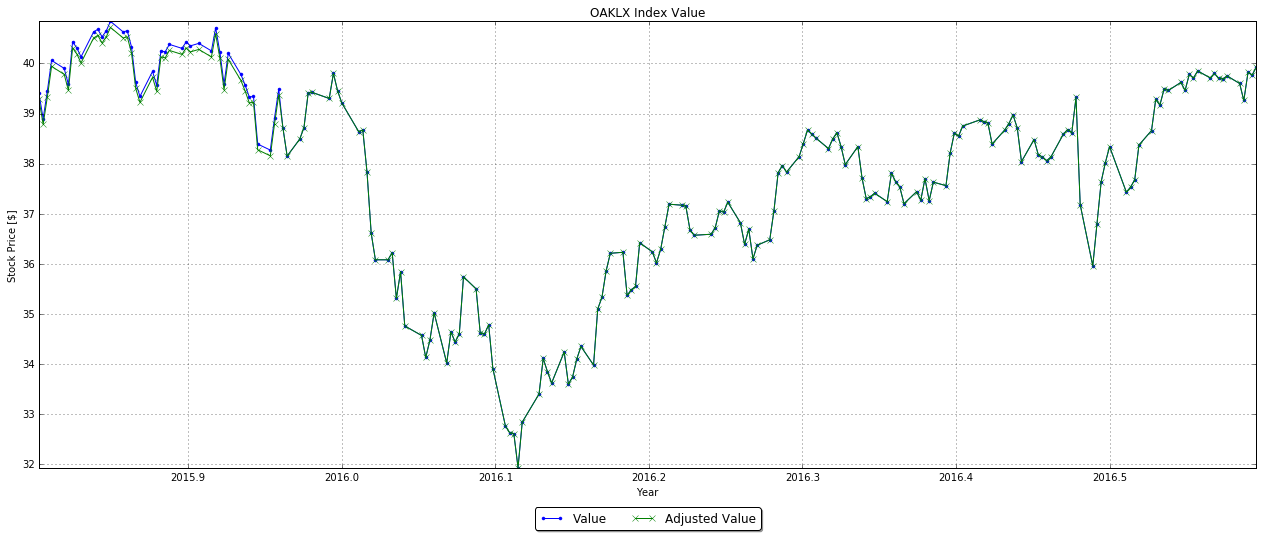

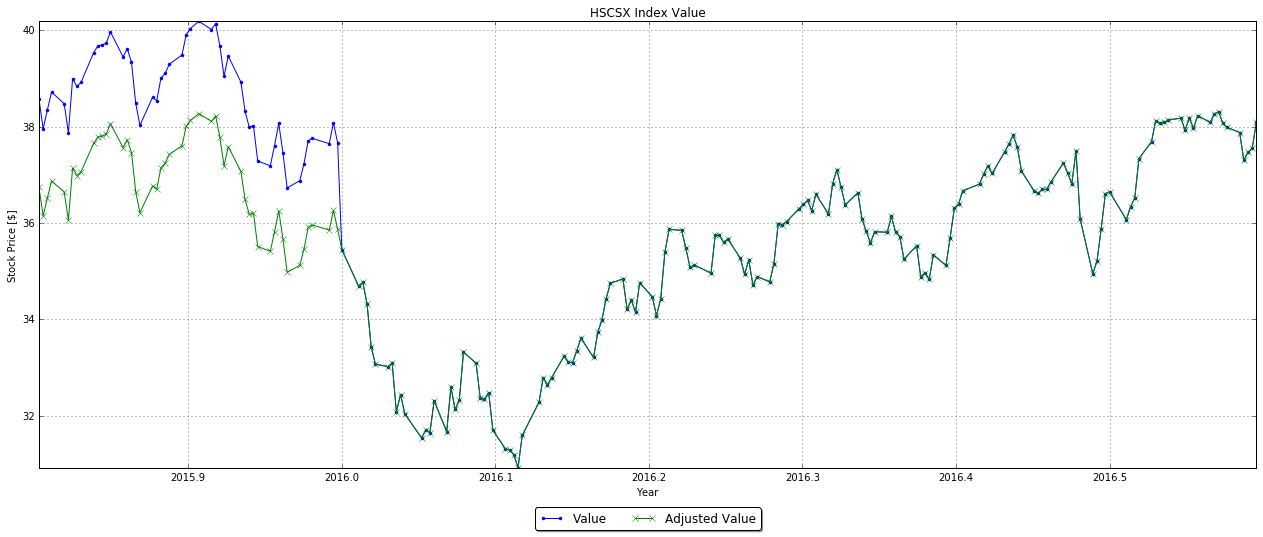

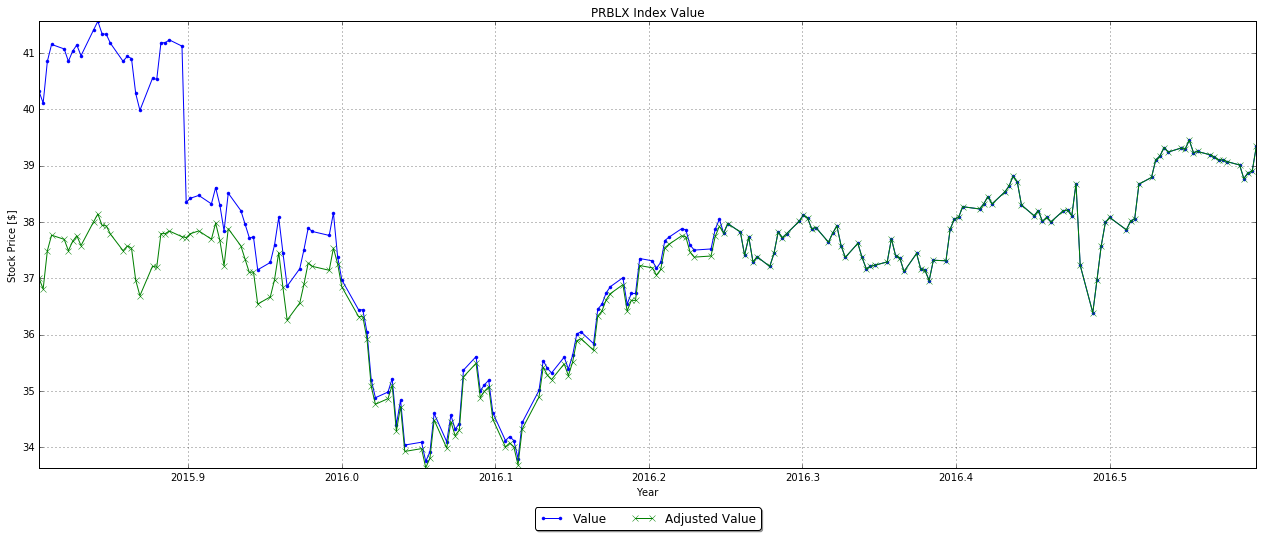

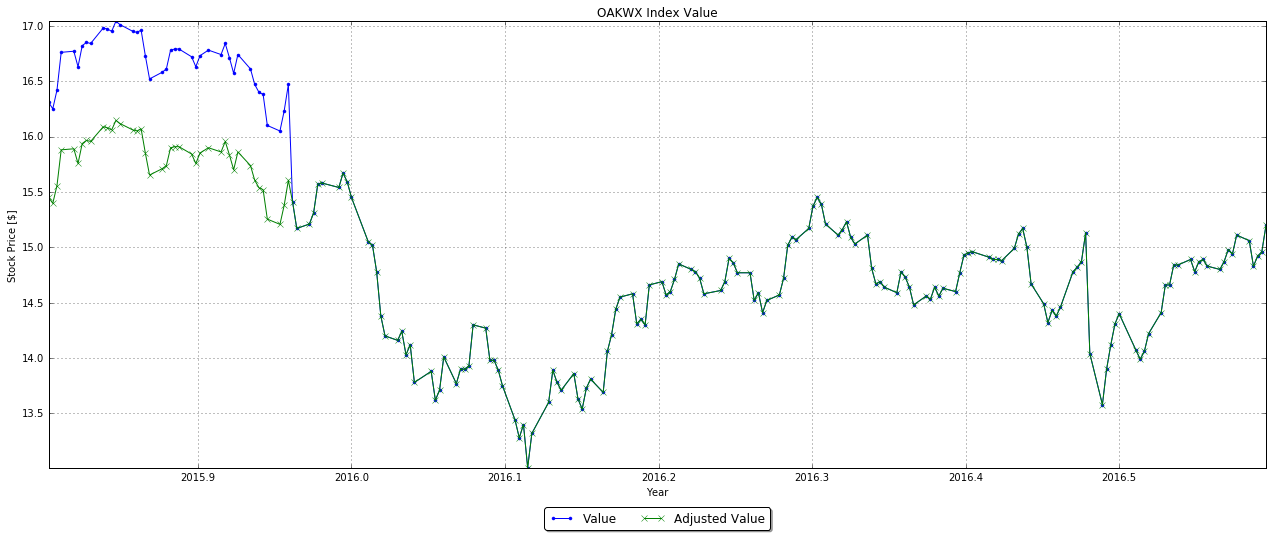

In [14]:
load_mut_fund('OAKLX',[0, 200])
load_mut_fund('HSCSX',[0, 200])
load_mut_fund('PRBLX',[0, 200])
load_mut_fund('OAKWX',[0, 200])

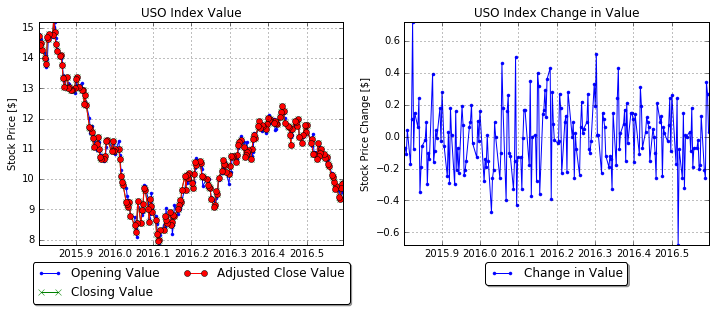

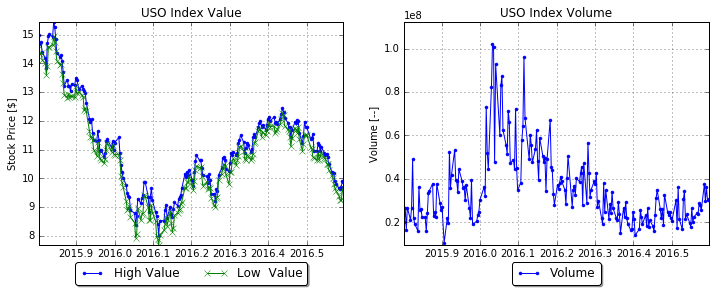

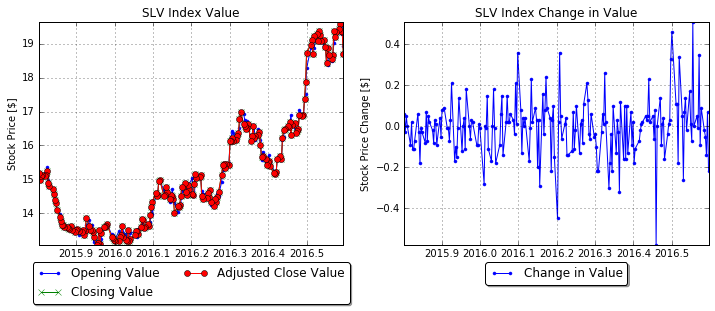

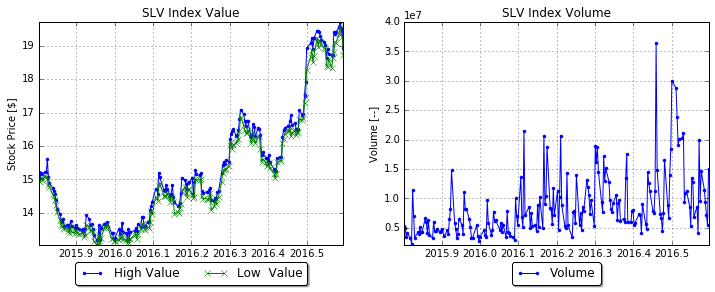

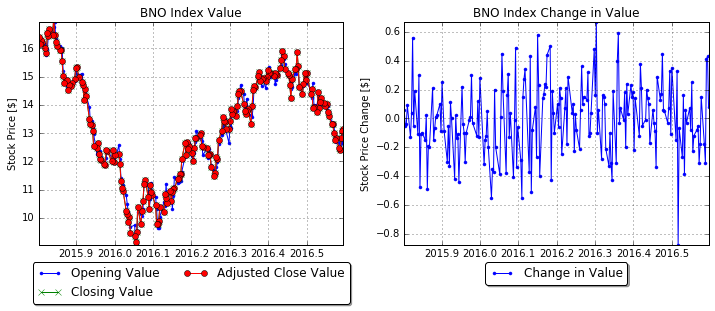

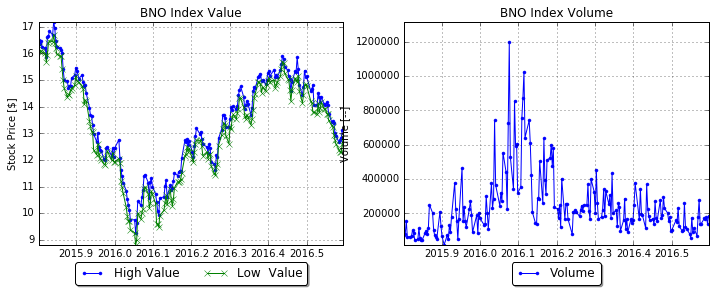

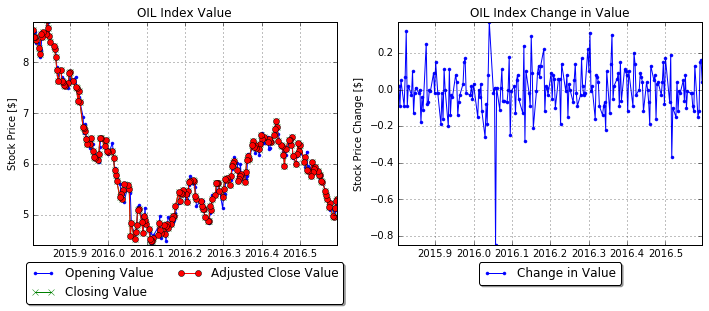

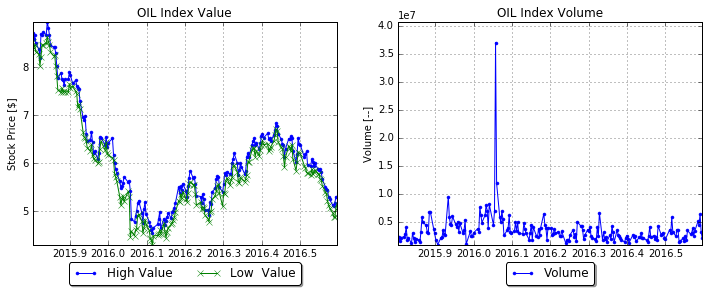

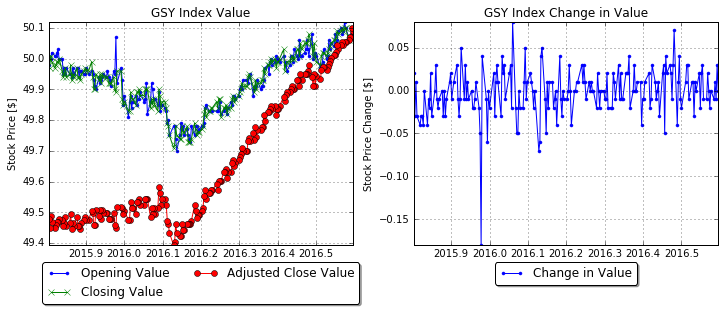

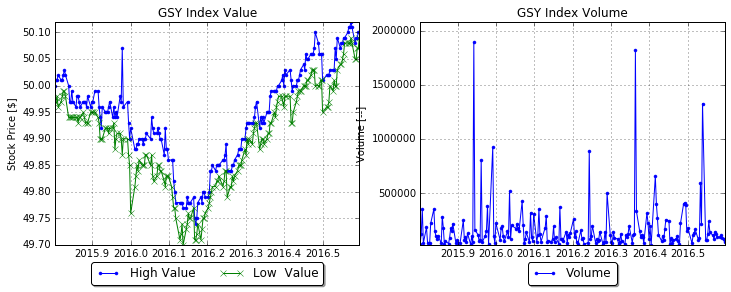

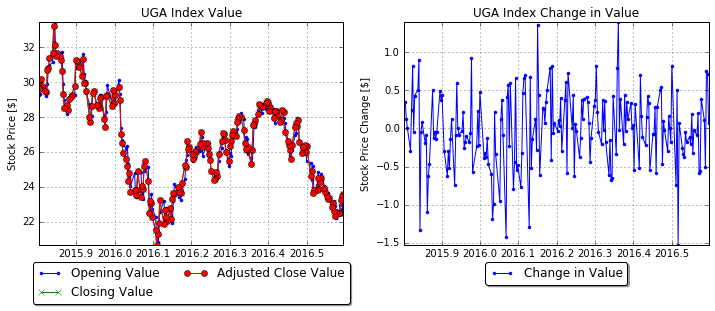

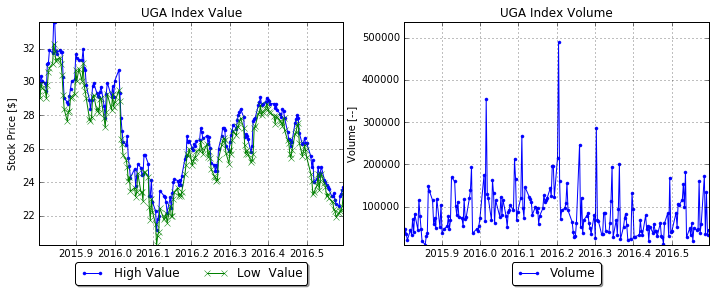

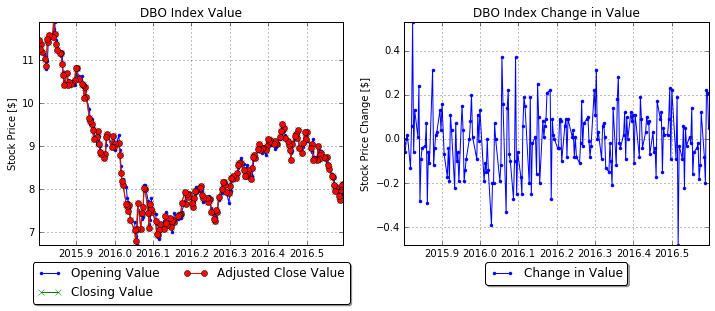

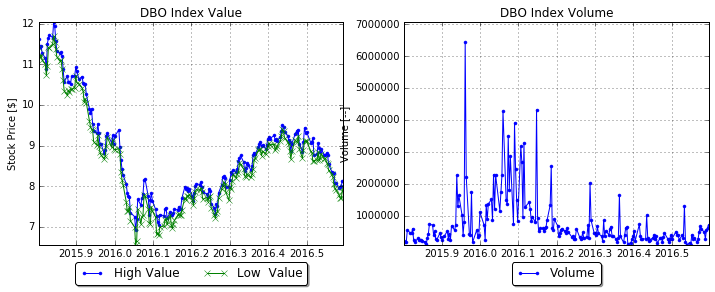

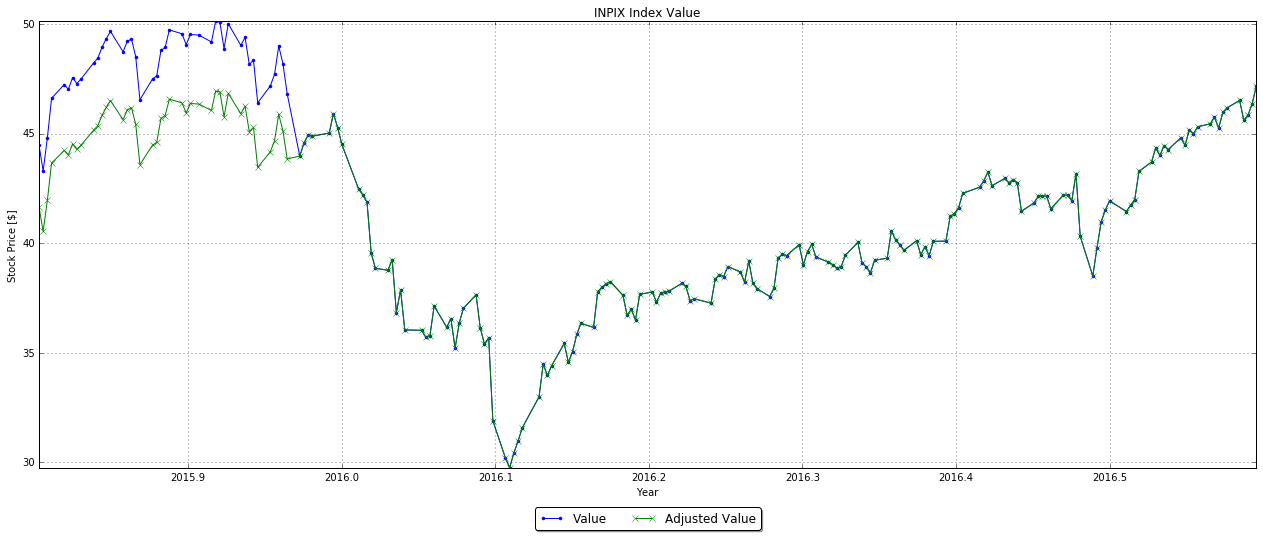

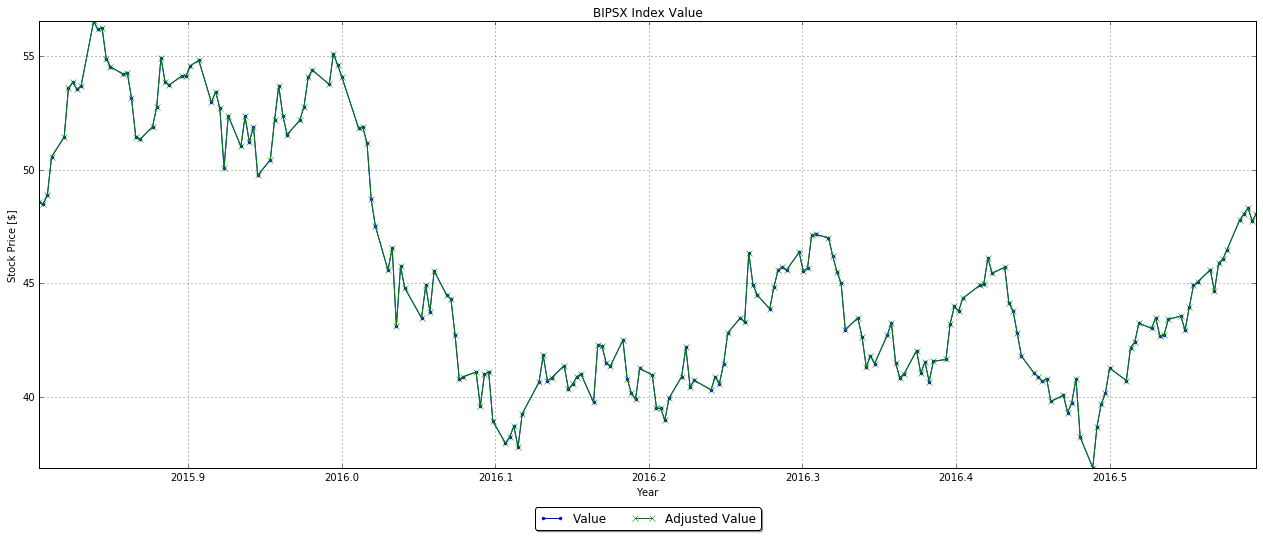

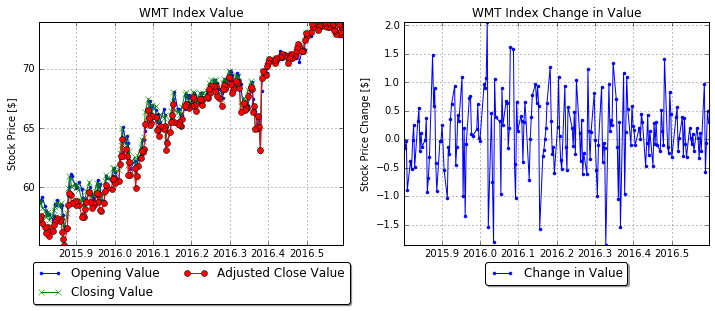

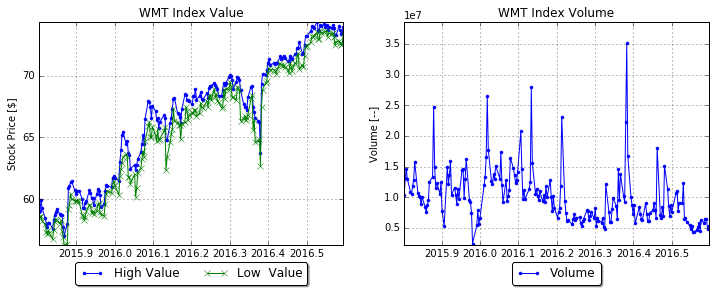

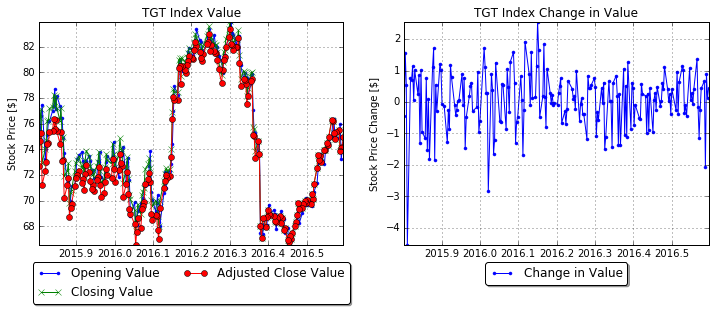

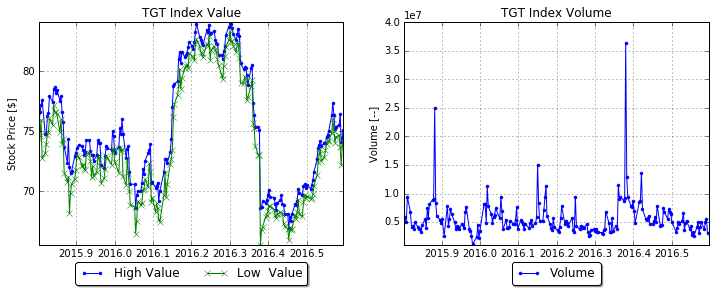

In [17]:
load_stock('USO',[0, 200])
load_stock('SLV',[0, 200])
load_stock('BNO',[0, 200])
load_stock('OIL',[0, 200])
load_stock('GSY',[0, 200])
load_stock('UGA',[0, 200])
load_stock('DBO',[0, 200])
load_mut_fund('INPIX',[0, 200])
load_mut_fund('BIPSX',[0, 200])
load_stock('WMT',[0, 200])
load_stock('TGT',[0, 200])

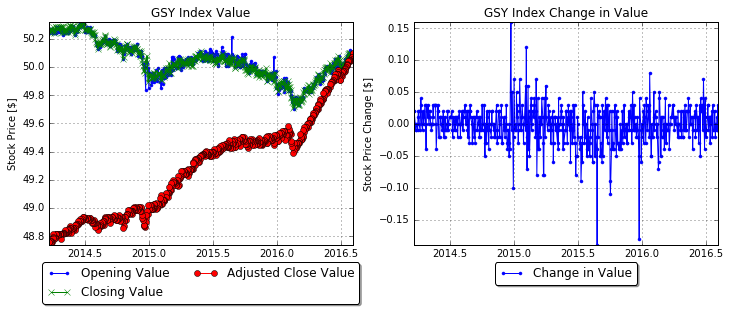

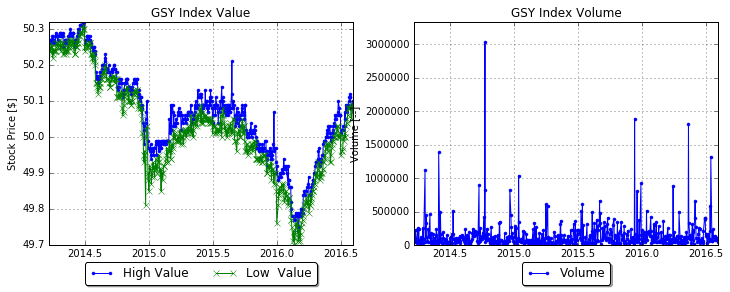

In [18]:
load_stock('GSY',[0, 600])